# Challenge 1: Classification
In this challenge, you're given a food classification dataset which has 101 classes. You need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. 

You are also required to write a function to apply an augmentation as explained below: <br>
1) Take 5 random images (numpy format) as an input to the function. <br>
2) Randomly arrange the 5 images in a single image while preserving the aspect ratio of each image. <br>
3) Final image size should be an input parameter to the function. <br>
4) Output format shall be numpy format. 
(Note - If required, you can use this augmentation function while training the models). <br>

<br>
Two models are to be trained for this task, mainly light, and medium model. <br>
Examples: <br>
Light model - mobilenetv2 <br>
Medium model - Resnet50 <br>
<br>

**Main Objective**:
You are supposed to use both TensorFlow and PyTorch for this task. You need to train one model for each framework. 

## Summary 

**Create a table for your train and test accuracy as well as speed for each model (mention the framework used for training)**

## Augmentation function given in the problem statement

In [ ]:
import numpy
def augmentation_function(input_images: List[numpy.ndarray], final_image_size: Tuple) -> numpy.ndarray:
    """Apply augmentation to a set of 5 images
    Args:
        input_images (List[numpy.ndarray]): List of 5 images in numpy format
        final_image_size (Tuple): A tuple of final image size in the format (width, height, channels)
    
    Returns:
        Image (numpy.ndarray): Augmented image
    """
    pass

# Analyze the dataset
## Objectives
1. Upload the dataset provided (Google Drive link). 
2. Extract the dataset. 
3. Re-arrange dataset into training and testing folders. 
4. List number of samples in training and testing folders. 
5. Plot sample images from training and testing datasets. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


In [ ]:
# Extract the dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# necessary imports
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import shutil
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [3]:
!unzip /content/gdrive/MyDrive/Hiring\ -\ Classification\ Challenge/food-101.zip

Streaming output truncated to the last 5000 lines.
  inflating: food-101/images/tacos/1058697.jpg  
  inflating: food-101/images/tacos/1059239.jpg  
  inflating: food-101/images/tacos/1059326.jpg  
  inflating: food-101/images/tacos/1066762.jpg  
  inflating: food-101/images/tacos/1070967.jpg  
  inflating: food-101/images/tacos/1073468.jpg  
  inflating: food-101/images/tacos/1075296.jpg  
  inflating: food-101/images/tacos/1085243.jpg  
  inflating: food-101/images/tacos/108529.jpg  
  inflating: food-101/images/tacos/1086014.jpg  
  inflating: food-101/images/tacos/108945.jpg  
  inflating: food-101/images/tacos/1089575.jpg  
  inflating: food-101/images/tacos/1091159.jpg  
  inflating: food-101/images/tacos/1101369.jpg  
  inflating: food-101/images/tacos/1109058.jpg  
  inflating: food-101/images/tacos/1109744.jpg  
  inflating: food-101/images/tacos/1119371.jpg  
  inflating: food-101/images/tacos/1123766.jpg  
  inflating: food-101/images/tacos/1124625.jpg  
  inflating: food-10

In [ ]:
datapath = "/content/food-101/images"
datapath

'/content/food-101/images'

**Re-arranging dataset into folders**

In [ ]:
# Function to re-arrange the dataset

In [ ]:
#Splitting the folders by python split folders

In [ ]:
pip install split_folders

In [ ]:
import splitfolders
outpath = "/content/food-101/dataset"
input_folder = datapath
splitfolders.ratio(input_folder, output=outpath, seed=42, ratio=(.75, .25))

Copying files: 101000 files [02:27, 686.99 files/s]


In [ ]:
ls food-101

dataset/  images/  meta/  mini/  README.txt


In [ ]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


In [ ]:
import os
foods_sorted = sorted(os.listdir(datapath))
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# create training data

In [ ]:
x = !find /content/food-101/dataset/train -type d -or -type f -printf '.' | wc -c
print("Total number of samples in train folder: " + str(x))

Total number of samples in train folder: ['75750']


In [ ]:
# create testing data

In [ ]:
y = !find /content/food-101/dataset/val -type d -or -type f -printf '.' | wc -c
print("Total number of samples in test folder: " + str(y))

Total number of samples in test folder: ['25250']


In [ ]:
# For the sake of both, yours and my simplicity
# Since, Working with that huge dataset would require a huge time
# I have tested my model first in a mini dataset which is a subset of the original dataset

In [ ]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette']
src_train = '/content/food-101/dataset/train'
dest_train = '/content/food-101/mini/train_mini'
src_test = '/content/food-101/dataset/val'
dest_test = '/content/food-101/mini/test_mini'

In [ ]:
# create mini training data

In [ ]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)
print("Total number of samples in train_mini folder")
!find food-101/mini/train_mini -type d -or -type f -printf '.' | wc -c

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Total number of samples in train_mini folder
2250


In [ ]:
# create mini testing data

In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)
print("Total number of samples in test_mini folder")
!find food-101/mini/test_mini -type d -or -type f -printf '.' | wc -c

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Total number of samples in test_mini folder
750


# Pre-process Images
## Objectives
1. Implement preprocessing codes for each model. 
2. Augment the dataset. 
3. Preview the preprocessed dataset. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Preprocessing steps for light model


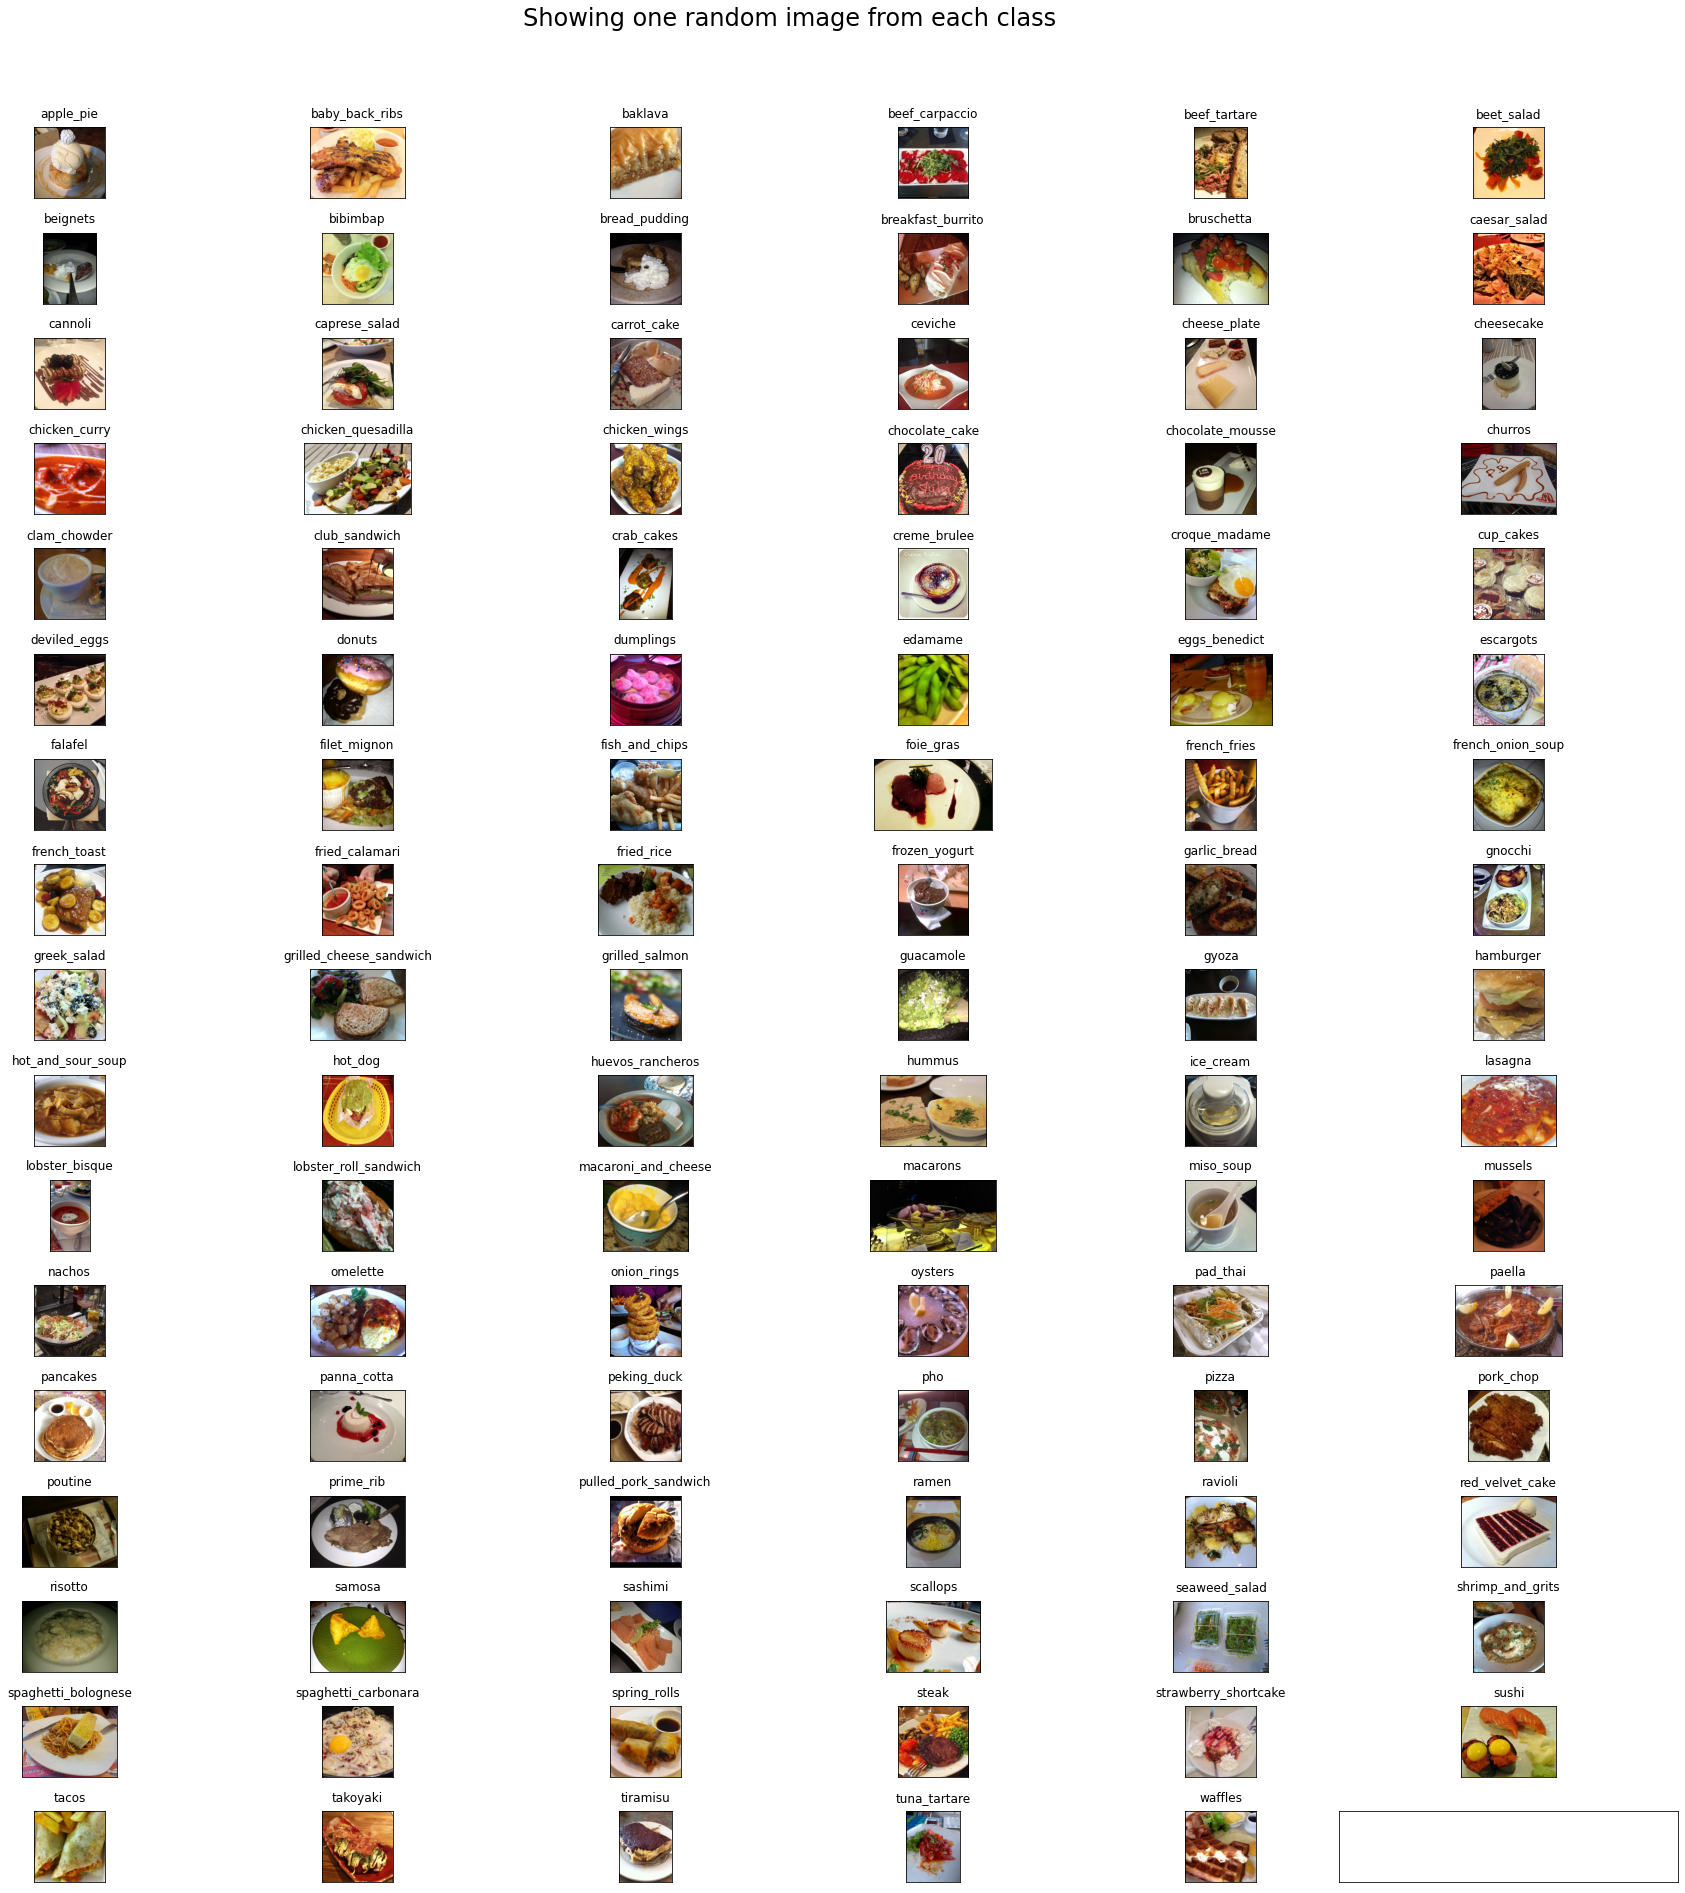

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

Inception V3 Model

Image Pre-processing is done using keras/tensorflow
Model fitting and training is performed

In [ ]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = '/content/food-101/mini/train_mini'
validation_data_dir = '/content/food-101/mini/test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=2,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
140/140 [==============================] - 102s 441ms/step - loss: 1.0396 - accuracy: 0.4964 - val_loss: 0.8390 - val_accuracy: 0.7500

Epoch 00001: val_loss improved from inf to 0.83905, saving model to best_model_3class.hdf5
Epoch 2/2
140/140 [==============================] - 58s 410ms/step - loss: 0.8259 - accuracy: 0.6952 - val_loss: 0.6586 - val_accuracy: 0.8261

Epoch 00002: val_loss improved from 0.83905 to 0.65862, saving model to best_model_3class.hdf5


In [ ]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

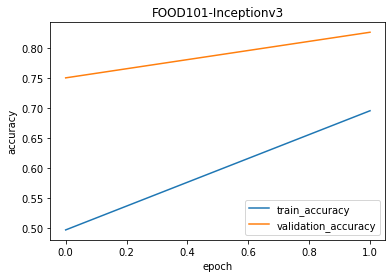

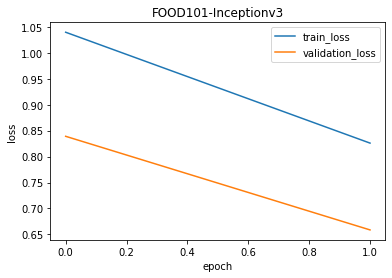

In [ ]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [ ]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

CPU times: user 1.68 s, sys: 58.8 ms, total: 1.74 s
Wall time: 1.72 s


In [ ]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
# Downloading images from internet using the URLs
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O applepie.jpg https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
#!wget -O pizza.jpg http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
#!wget -O omelette.jpg https://www.incredibleegg.org/wp-content/uploads/basic-french-omelet-930x550.jpg

--2021-06-23 16:17:12--  http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
Resolving veggiefoodrecipes.com (veggiefoodrecipes.com)... 62.75.168.50
Connecting to veggiefoodrecipes.com (veggiefoodrecipes.com)|62.75.168.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75560 (74K) [image/jpeg]
Saving to: ‘samosa.jpg’

samosa.jpg          100%[===================>]  73.79K   429KB/s    in 0.2s    

2021-06-23 16:17:12 (429 KB/s) - ‘samosa.jpg’ saved [75560/75560]

--2021-06-23 16:17:12--  https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
Resolving acleanbake.com (acleanbake.com)... 138.197.203.41
Connecting to acleanbake.com (acleanbake.com)|138.197.203.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114276 (112K) [image/jpeg]
Saving to: ‘applepie.jpg’

applepie.jpg        100%[===================>] 111.60K  --.-KB/s    in 0.1s

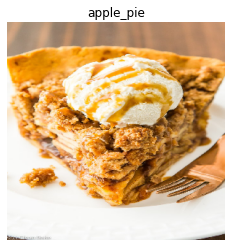

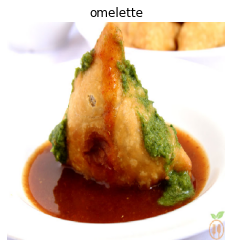

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('applepie.jpg')
images.append('samosa.jpg')
#images.append('omelette.jpg')
predict_class(model_best, images, True)

In [ ]:
len(model.layers)

315

In [ ]:
K.clear_session()
n_classes = 101
img_width, img_height = 299, 299
train_data_dir = '/content/food-101/dataset/train'
validation_data_dir = '/content/food-101/dataset/val'
nb_train_samples = 75750
nb_validation_samples = 25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_101class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_101class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_101class.hdf5')

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
class_map_101 = train_generator.class_indices
class_map_101

In [ ]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [ ]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('applepie.jpg')
images.append('samosa.jpg')
#images.append('omelette.jpg')
predict_class(model_best, images, True)

### Preprocessing steps for medium model

Resnet50 Model for food 101 classification

In [ ]:
data_dir = '/content/food-101'
imgs_dir = os.path.join(data_dir, 'images')
meta_dir = os.path.join(data_dir, 'meta')

In [ ]:
train_meta = pd.read_csv(os.path.join(meta_dir, 'train.txt'), delimiter='/', names=['target', 'image'])
test_meta = pd.read_csv(os.path.join(meta_dir, 'test.txt'), delimiter='/', names=['target', 'image'])
train_meta['train'] = 1
test_meta['train'] = 0

In [ ]:
all_data = pd.concat([train_meta, test_meta])
targets = all_data['target']
all_data = pd.get_dummies(all_data, columns=['target'])
all_data['target'] = targets
print(all_data.head())

In [ ]:
labels = [label[7:] for label in all_data.columns.values[2:103]]
print(labels)

In [ ]:
train_meta = all_data[all_data['train']==1]
test_meta = all_data[all_data['train']==0]
train_meta.drop('train', axis=1, inplace=True)
test_meta.drop('train', axis=1, inplace=True)
print(train_meta.head())
print(test_meta.head())

In [ ]:
counts = train_meta.groupby('target')['image'].count()

In [ ]:
counts.plot(kind='bar', stacked='True', figsize=(20, 10), color='blue', legend=False);

In [ ]:
import tensorflow as tf
import random

In [ ]:
# Declare an ImageDataGenerator object with proper image transformations and preprocessing.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            brightness_range=None,
            shear_range=0.2,
            zoom_range=0.2,
            channel_shift_range=0.0,
            fill_mode="nearest",
            horizontal_flip=True,
            vertical_flip=True,
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )
# A generator with no augmentation (for testing)
image_generator_no_aug = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )

In [ ]:
def generator(df, batch_size=32, target_size=224, test=False):
    """
    Takes a train/test metadata DataFrame and yields a batch of (x, y) for training/testing.
    Usage:
    (x, y) = generator(df, batch_size, target_size)
    Inputs:
    df - train/test metadata (DataFrame)
    batch_size - batch size for train/test (int)
    target_size - target size for input image (int)
    Output:
    A batch of training/testing data of size [batch_size, target_size, target_size, 3] (float)
    """
    num_imgs = len(df) # Number of images in the train/test set
    while True:
        batch_rows = df.iloc[random.choices(range(0,num_imgs), k=batch_size)] # Select batch_size number of random
                                                                              # rows from the meta data
        x = []
        y = []
        for _,row in batch_rows.iterrows():
            file_name = row['target'] + '/' + str(row['image']) + '.jpg' # Image file name
            image = tf.keras.preprocessing.image.load_img(
                os.path.join(imgs_dir, file_name), 
                target_size=(target_size, target_size)
            )                                                            # Read image
            input_arr = tf.keras.preprocessing.image.img_to_array(image) # Convert image to array
            x.append(input_arr)                                          # Append image array to x
            y.append(row.iloc[1:102].values)                             # Append categorical label to y
        # Convert x and y to numpy arrays
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)
        # Perform transformations
        if test:
            data_generator = image_generator_no_aug.flow(x, y, batch_size=batch_size)
        else:
            data_generator = image_generator.flow(x, y, batch_size=batch_size) 
        xt, yt = data_generator.next()
        # Yield outputs
        yield(np.array(xt), np.array(yt))

In [ ]:
batch_size = 16
img_size = 224
dropout = 0.5
num_imgs = len(train_meta)
num_val_imgs = len(test_meta)
steps = int(num_imgs/batch_size)
val_steps = int(num_val_imgs/batch_size)
model_file = 'resnet50_do_{}.h5'.format(dropout)
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
# For sub-plot
num_cols = 8 
num_rows = np.ceil(batch_size/num_cols)
# Declare train and test generators
train_generator = generator(train_meta, batch_size=batch_size, target_size=img_size)
test_generator = generator(test_meta, batch_size=batch_size, target_size=img_size, test=True)

x, y = next(test_generator) # Get a single batch of train data
# Plot all the images in the batch
for i in range(0, batch_size):
    img = x[i,:,:,:]
    # Inverse preprocessing
    img[:,:,2] += 103.939
    img[:,:,1] += 116.779
    img[:,:,0] += 123.68
    # Plot
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(img/255)

In [ ]:
def get_model():
    """
    Returns the network model.
    The base model is ResNet50 trained on imagenet dataset.
    The classifier contains 3 FC layers with 4096, 4096 and 101 nuerons respectively.
    """
    base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
    #for layer in base_model.layers:
    #layer.trainable = False
    #base_model.summary()
    features = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(features)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Dense(101, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)
    return model


In [ ]:
class TheCallback(tf.keras.callbacks.Callback):
    """
    A single callback class that combines all the best practises.
    1. Evaluates the validation loss and accuracy at the end of every epoch.
    2. Live plot of training curves (both loss and accuracy) updated after every epoch.
    3. Learning rate reduction on loss plateau.
    4. Saves best model to file.
    """
    def __init__(self, val_generator, val_steps, patience=5, lr_factor=0.1, model_file='model.h5'):
        self.val_generator = val_generator
        self.patience = patience
        self.best = np.Inf
        self.lr_factor = lr_factor
        self.model_file = model_file
        self.val_steps = val_steps
        
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.wait = 0
        self.best_weights = None
        print('Begin training with lr = {}'.format(self.model.optimizer.lr.numpy))
        
    def on_epoch_end(self, epoch, logs={}):
        
        # Append training loss and accuracy
        self.losses.append(logs['loss'])
        self.acc.append(logs['acc'])
        
        # Evaluate model
        model = self.model
        metrics = model.evaluate(
            self.val_generator, 
            steps=self.val_steps, 
            return_dict=True
        )
        
        # Append validation loss and accuracy
        self.val_losses.append(metrics['loss'])
        self.val_acc.append(metrics['acc'])
        
        # Plot learning curves
        plt.subplot(1,2,1)
        plt.plot(self.losses, label='Train Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(self.acc, label='Train Accuracy')
        plt.plot(self.val_acc, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        clear_output(wait=True)
        plt.show()
        
        # Rate reduction on plateau
        if self.val_losses[-1] < self.best:
            self.best = self.val_losses[-1]
            self.model.save(self.model_file) # Save the best model to file
            print('Saving model to {} at epoch: {}.' 
                  'Validation Loss: {}. Validation Accuracy: {}'
                  .format(self.model_file, epoch, self.val_losses[-1], self.val_acc[-1])
                 )
            self.wait = 0
        else:
            self.wait += 1
            # If ran out of patience reduce lr
            if self.wait >= self.patience:
                lr = tf.keras.backend.get_value(self.model.optimizer.lr) # Current lr
                tf.keras.backend.set_value(self.model.optimizer.lr, lr*self.lr_factor) # Reduce lr by lr_factor
                print('Reducing lr from {} to {}'.format(lr, lr*self.lr_factor))

In [ ]:
model = get_model()
#model = tf.keras.models.load_model('resnet50_do0.2.h5')
model.summary()
opt = tf.keras.optimizers.Adam(lr=1e-4) # Set initial lr = best lr
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=opt)

In [ ]:
# Declare the callback
callback = TheCallback(test_generator, val_steps, patience=2, lr_factor=0.5, model_file=model_file)

In [ ]:
# Run the model
history = model.fit_generator(train_generator, epochs=2, steps_per_epoch=steps, verbose=1, callbacks=[callback])

In [ ]:
model = tf.keras.models.load_model(model_file)
model.summary()

In [ ]:
x = []
y = []
true_count = 0 # Count of correctly classified
total_count = 0 # Total count of images tested
acc = 0 # Accuracy
# Run through all the test images
for _,row in test_meta.iterrows():
    file_name = row['target'] + '/' + str(row['image']) + '.jpg' # Test image file name
    image = tf.keras.preprocessing.image.load_img(
        os.path.join(imgs_dir, file_name), 
        target_size=(img_size, img_size)
    )                                                            # Load test image
    x = tf.keras.applications.resnet50.preprocess_input(
        tf.keras.preprocessing.image.img_to_array(image)
    ) # Apply pre-processing
    x = np.expand_dims(x, axis=0) # [224, 224, 3] => [1, 224, 224, 3]
    
    pred = model.predict(x) # Get probablities
    y.append(labels[np.argmax(pred)]) # Append class with max probablity to list of outputs
    # If prediction is correct increment true count
    if y[-1] == row['target']:
        true_count += 1
    total_count += 1
    acc = true_count * 100 / total_count # Calculate accuracy
    clear_output(wait=True)
    print('Tested {} images. Accuracy = {}'.format(total_count, acc))
clear_output(wait=True)
print('Test accuracy = {}'.format(acc)) 

In [ ]:
def random_crop_image(img, crop_size=224, crop_percent=75):
    """
    Returns a random crop of the input image. The crop will contain crop_percent% of the input and will be
    resized to [crop_size, crop_size, 3] before returning.
    Usage:
    random_crop_image(img, crop_size, crop_percent)
    Inputs:
    img - Input image
    crop_size - The required output size. Default is 224.
    crop_percent - Percent part of the input required in the output. Default is 75.
    """ 
    width, height = img.size # Size of input
    # Size of cropped image
    cut_size_x = int(width * crop_percent/100)
    cut_size_y = int(height * crop_percent/100)
    # Randomly select starting point
    start_y = np.random.randint(0, height - cut_size_y)
    start_x = np.random.randint(0, width - cut_size_x)
    # Crop and resize
    crop = img.crop(box=(start_x, start_y, start_x + cut_size_x, start_y + cut_size_y))
    crop = crop.resize((crop_size, crop_size))
    return crop

In [ ]:
x = []
y = []
num_crops = 10
true_count = 0 # Count of correctly classified
total_count = 0 # Total count of images tested
acc = 0 # Accuracy
# Run through all the test images
for _,row in test_meta.iterrows():
    x = np.zeros((num_crops, img_size, img_size, 3))
    file_name = row['target'] + '/' + str(row['image']) + '.jpg' # Image file name
    image = tf.keras.preprocessing.image.load_img(
        os.path.join(imgs_dir, file_name), 
        target_size=(img_size, img_size)
    )                                                            # Read image
    # Take 10 random crops of each image
    for i in range(0, num_crops):
        x[i, :, :, :] = tf.keras.applications.resnet50.preprocess_input(
            tf.keras.preprocessing.image.img_to_array(
                random_crop_image(image, crop_percent=90)
            )
        )
    pred = model.predict(x) # Make predicition on all 10 crops
    y.append(labels[np.argmax(np.sum(pred, axis=0))]) # Take average and append to y
    # If prediction is correct increment true count
    if y[-1] == row['target']:
        true_count += 1
    total_count += 1
    acc = true_count * 100 / total_count # Calculate accuracy
    clear_output(wait=True)
    print('Tested {} images. Accuracy = {}'.format(total_count, acc))
clear_output(wait=True)
print('Test accuracy = {}'.format(acc)) 

Preprocessing steps for heavier model

# Training different models
## Objectives
1. Obtain 90% accuracy in all the models trained. 
2. You're free to use any techniques for traning such as transfer learning, knowledge transfer, etc. 
3. The models should not overfit the training dataset. 
4. Measure the performance in terms of accuracy and speed of each model. 
5. Visualize the training and testing performance using TensorBoard. 

#### Optional:
1. Apply weight quantization to increase the speed of the models. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


## Train Light model

## Train Medium model